# Evaluating predictions

This notebook is used to evaluate the predictions against all available masks and uses many segmentation quality metrics.

In [17]:
import nibabel as ni
import numpy as np
# import argparse

import pandas as pd

import Utils.view as vi
import Utils.Metrics as mt

import seaborn as sns
import matplotlib.pyplot as plt

# Step 1 - Paths definition

It is important to remember you do not have the manual masks for the test set since it is used for classifying the competitors in a leaderboard. You could check your performance by using another subject group, such as the fine_tuning_subjects.

In [18]:
# Paths
dataset_folder = './Data/HCP_processed_data/'
subject_list = 'testing_subjects.txt'
subject_list = 'testing_subjects.txt'
prediction_folder = './Predictions/fine_tuning_unet_single_label_freeze/axial-coronal-sagittal_evalue1T1/'


mask_sufixes  = ['STAPLE/STAPLE_th0.5_thalamus_1.25.nii.gz',
                 'FreeSurfer/aparc+aseg_1.25_nearest.nii.gz',
                 'FSL/T1_first_all_fast_firstseg_1.25_nearest.nii.gz',
                 'QuickNAT/segmentation_acpc_dc_restore_1.25_nearest.nii.gz',
                 'manual/manual.nii.gz']

structure_indexes_sta = np.array([10, 49])
structure_indexes_free = np.array([10, 49])
structure_indexes_fsl = np.array([10, 49])
structure_indexes_qui = np.array([7, 25])
structure_indexes_man = np.array([10, 49])
labels_indexes = [structure_indexes_sta, structure_indexes_free, structure_indexes_fsl, 
                  structure_indexes_qui, structure_indexes_man]
masks = ['FreeSurfer', 'FSL', 'QuickNAT','STAPLE', 'manual']

structure_indexes_pred = np.array([1])


# Step 2 - Loading files and metric computation

In [19]:
%%time

subjects = [line.strip() for line in open(subject_list)]


OVERLAPS = []
DISTANCES = []
SUBJECTS = []
MASKS = []

for mask_index, mask_sufix in enumerate(mask_sufixes):
    print(mask_sufix)
    
    for subject in subjects:
        print('subject = ', subject)
        try:
            prediction = ni.load(prediction_folder + subject + '.nii.gz').get_data()
            mask = ni.load(dataset_folder + subject + '/' + mask_sufix).get_data()

            stded_pred = np.zeros(prediction.shape)
            for label_index in structure_indexes_pred:
                stded_pred += (np.around(prediction) == label_index)

            stded_mask = np.zeros(mask.shape)
            for label_index in labels_indexes[mask_index]:
                stded_mask += (np.around(mask) == label_index)

            overlap_measures, distance_measures = mt.testing_metrics(stded_mask.astype('uint8'), stded_pred.astype('uint8'))

            OVERLAPS.append(overlap_measures[0])
            DISTANCES.append(distance_measures[0])
            SUBJECTS.append(subject)
            MASKS.append(masks[mask_index])
        except:
            print(f"File error on folder {mask_sufix}")
        

print('-Done-')

STAPLE/STAPLE_th0.5_thalamus_1.25.nii.gz
subject =  103010
subject =  112314


<timed exec>:15: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
<timed exec>:16: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


subject =  129634
subject =  153025
subject =  154229
subject =  160123
subject =  161630
subject =  187850
subject =  191841
subject =  199251
subject =  200311
subject =  268850
subject =  287248
subject =  300618
subject =  352132
subject =  561444
subject =  580347
subject =  604537
subject =  792564
subject =  814649
FreeSurfer/aparc+aseg_1.25_nearest.nii.gz
subject =  103010
subject =  112314
subject =  129634
subject =  153025
subject =  154229
subject =  160123
subject =  161630
subject =  187850
subject =  191841
subject =  199251
subject =  200311
subject =  268850
subject =  287248
subject =  300618
subject =  352132
subject =  561444
subject =  580347
subject =  604537
subject =  792564
subject =  814649
FSL/T1_first_all_fast_firstseg_1.25_nearest.nii.gz
subject =  103010
subject =  112314
subject =  129634
subject =  153025
subject =  154229
subject =  160123
subject =  161630
subject =  187850
subject =  191841
subject =  199251
subject =  200311
subject =  268850
subject

In [20]:
df_masks = pd.DataFrame(MASKS, columns = ['mask'])   
df_subjects = pd.DataFrame(SUBJECTS, columns = ['subjec'])   
df_OVERLAP = pd.DataFrame(OVERLAPS, columns = ['DiceCoefficient','FalseNegativeError',
                                                   'FalsePositiveError', 'JaccardCoefficient',
                                                   'VolumeSimilarity', '1-VolumeSimilarity/2'])
df_DISTANCE = pd.DataFrame(DISTANCES, columns = ['AverageHausdorffDistance','HausdorffDistance'])
df_results = pd.concat([df_masks, df_subjects, df_OVERLAP, df_DISTANCE], axis=1, join="inner")
df_results


,mask,subjec,DiceCoefficient,FalseNegativeError,FalsePositiveError,JaccardCoefficient,VolumeSimilarity,1-VolumeSimilarity/2,AverageHausdorffDistance,HausdorffDistance
0,FreeSurfer,103010,0.855596,0.007050,0.248376,0.747634,0.276659,0.861671,0.148318,3.316625
1,FreeSurfer,112314,0.822746,0.000501,0.300887,0.698868,0.353684,0.823158,0.187081,3.605551
2,FreeSurfer,129634,0.851468,0.002054,0.257514,0.741353,0.293559,0.853220,0.148726,3.000000
3,FreeSurfer,153025,0.860096,0.004947,0.242626,0.754533,0.271257,0.864372,0.144619,3.000000
4,FreeSurfer,154229,0.823907,0.000779,0.299071,0.700546,0.350900,0.824550,0.180923,3.162278
...,...,...,...,...,...,...,...,...,...,...
75,STAPLE,561444,0.803218,0.005883,0.326176,0.671148,0.384058,0.807971,0.242580,65.795137
76,STAPLE,580347,0.802422,0.004374,0.327985,0.670037,0.388105,0.805947,0.219992,5.830952
77,STAPLE,604537,0.806762,0.005286,0.321451,0.676111,0.377902,0.811049,0.230825,10.816654
78,STAPLE,792564,0.823746,0.004628,0.297399,0.700314,0.344847,0.827576,0.197534,23.345235


# Step 3 - Evaluating the predictions

Mean value for each metric across subjects for each mask as ground truth

In [21]:
df_results[["mask", "DiceCoefficient", "FalseNegativeError", "FalsePositiveError", "JaccardCoefficient",
            "VolumeSimilarity", "1-VolumeSimilarity/2", "AverageHausdorffDistance", "HausdorffDistance"]].groupby("mask").mean()

,DiceCoefficient,FalseNegativeError,FalsePositiveError,JaccardCoefficient,VolumeSimilarity,1-VolumeSimilarity/2,AverageHausdorffDistance,HausdorffDistance
mask,,,,,,,,
FSL,0.828570,0.020042,0.281364,0.707858,0.308522,0.845739,0.200735,4.612137
FreeSurfer,0.836307,0.003125,0.279148,0.719118,0.322035,0.838983,0.169993,3.739274
QuickNAT,0.837305,0.013610,0.270893,0.720533,0.299881,0.850060,0.172539,3.428702
STAPLE,0.810696,0.004635,0.315550,0.682173,0.370946,0.814527,0.225678,23.739552


Standard deviation for each metric across subjects for each mask as ground truth

In [22]:
df_results[["mask", "DiceCoefficient", "FalseNegativeError", "FalsePositiveError", "JaccardCoefficient",
            "VolumeSimilarity", "1-VolumeSimilarity/2", "AverageHausdorffDistance", "HausdorffDistance"]].groupby("mask").std()

,DiceCoefficient,FalseNegativeError,FalsePositiveError,JaccardCoefficient,VolumeSimilarity,1-VolumeSimilarity/2,AverageHausdorffDistance,HausdorffDistance
mask,,,,,,,,
FSL,0.021456,0.012269,0.035547,0.031205,0.055599,0.027800,0.028861,0.587763
FreeSurfer,0.019450,0.003408,0.029935,0.028488,0.043295,0.021648,0.020861,0.578407
QuickNAT,0.018093,0.037033,0.033774,0.026509,0.076424,0.038212,0.026260,0.506795
STAPLE,0.021487,0.003373,0.031390,0.030127,0.047042,0.023521,0.039824,26.083543


Boxplot for dice coefficient and for Average Hausdorff Distance

[Text(0, 0, 'FreeSurfer'),
 Text(1, 0, 'FSL'),
 Text(2, 0, 'QuickNAT'),
 Text(3, 0, 'STAPLE')]

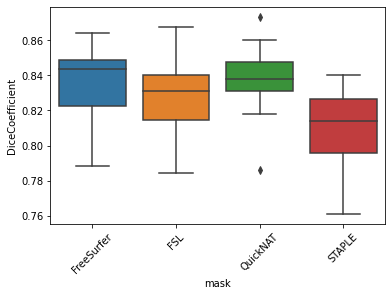

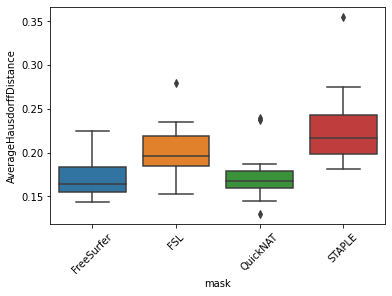

In [23]:
ax = sns.boxplot(x="mask", y="DiceCoefficient", data=df_results)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.figure()
ax = sns.boxplot(x="mask", y="AverageHausdorffDistance", data=df_results)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)